# Amirhossein Rostami - 2084299 
# Abbas Zal - 2072054

### Human Data Analytics Course 2024 

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import time
import os
import zipfile
from scipy.signal import medfilt
# from tqdm import tqdm
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, accuracy_score, precision_recall_curve,classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from collections import Counter
from tensorflow.keras.metrics import Accuracy, Precision, Recall,SparseCategoricalAccuracy
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc, precision_recall_curve, average_precision_score, precision_recall_curve, average_precision_score, precision_score, recall_score,f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import plot_model
import visualkeras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical,pad_sequences
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense,Conv2D,MaxPooling2D
import os
import pandas as pd
import numpy as np
from scipy.fftpack import fft, dct
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('norm_data.csv')
df.columns

Index(['activity', 'time_s', 'lw_r', 'lh_r', 'la_r', 'ra_r'], dtype='object')

# Features Extraction FFT/DCT


In [3]:


# Load data
df = pd.read_csv('norm_data.csv')


# Create directory for saving the datasets
output_dir = 'new_dataset_norm_features'
os.makedirs(output_dir, exist_ok=True)

# Function to extract features from a window
def extract_features(window):
    features = {}
    window = np.asarray(window)  

    # Compute time-domain features
    features['mean'] = np.mean(window)
    features['std'] = np.std(window)
    features['skew'] = skew(window)
    features['kurtosis'] = kurtosis(window)
    features['min'] = np.min(window)
    features['max'] = np.max(window)
    features['range'] = np.ptp(window)  # peak to peak
    
    # Compute FFT and take the first half (positive frequencies)
    fft_values = np.abs(fft(window))[:len(window)//2]
    features['fft_mean'] = np.mean(fft_values)
    features['fft_std'] = np.std(fft_values)
    features['fft_skew'] = skew(fft_values)
    features['fft_kurtosis'] = kurtosis(fft_values)
    features['fft_min'] = np.min(fft_values)
    features['fft_max'] = np.max(fft_values)
    features['fft_range'] = np.ptp(fft_values)
    features['fft_energy'] = np.sum(np.square(fft_values))
    
    # Compute DCT and take the first half
    dct_values = np.abs(dct(window, norm='ortho'))[:len(window)//2]
    features['dct_mean'] = np.mean(dct_values)
    features['dct_std'] = np.std(dct_values)
    features['dct_skew'] = skew(dct_values)
    features['dct_kurtosis'] = kurtosis(dct_values)
    features['dct_min'] = np.min(dct_values)
    features['dct_max'] = np.max(dct_values)
    features['dct_range'] = np.ptp(dct_values)
    features['dct_energy'] = np.sum(np.square(dct_values))

    return features

# Loop over each window size and each signal
for window_size in window_sizes:
    step_size = window_size  # non-overlapping windows
    
    for signal in ['lw_r', 'lh_r', 'la_r', 'ra_r']:
        feature_data = []
        
        for start in range(0, len(df) - window_size + 1, step_size):
            end = start + window_size
            
            # Check if all values in the activity column are the same
            if len(df['activity'].iloc[start:end].unique()) == 1:
                # Extract window for the signal
                window = df[signal].iloc[start:end]
                features = extract_features(window)
                
                # Add additional context to features
                features['signal'] = signal
                features['window_size'] = window_size
                features['start_time'] = df['time_s'].iloc[start]
                features['end_time'] = df['time_s'].iloc[end - 1]
                features['activity'] = df['activity'].iloc[start]  # Assuming the activity is the same throughout the window
                
                feature_data.append(features)
        
        # Convert the feature data to a DataFrame
        features_df = pd.DataFrame(feature_data)
        
        # Save to CSV with a specific name format
        output_file = f"{output_dir}/extracted_features_{signal}_{window_size}.csv"
        features_df.to_csv(output_file, index=False)

print("Feature extraction and saving completed.")


NameError: name 'window_sizes' is not defined

In [1]:
path_256 = 'D:/PhysicsofData/HDA/HDA_P3/new_dataset_norm_features/256'
path_512 = 'D:/PhysicsofData/HDA/HDA_P3/new_dataset_norm_features/512'
path_1024 = 'D:/PhysicsofData/HDA/HDA_P3/new_dataset_norm_features/1024'

In [2]:
ex_path = 'D:/PhysicsofData/HDA/HDA_P3/new_dataset_norm_features/256/extracted_features_la_r_256.csv'

exm_ = pd.read_csv(ex_path)
exm_.columns


NameError: name 'pd' is not defined

In [6]:


def create_merged_df(directory): #merges the features together with 4 different signal 
    
    
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    dataframes = []
    for idx, file in enumerate(csv_files):

        df = pd.read_csv(os.path.join(directory, file))

        columns_to_rename = ['mean', 'std', 'skew', 'kurtosis', 'min', 'max', 'range', 'fft_mean',
       'fft_std', 'fft_skew', 'fft_kurtosis', 'fft_min', 'fft_max',
       'fft_range', 'fft_energy', 'dct_mean', 'dct_std', 'dct_skew',
       'dct_kurtosis', 'dct_min', 'dct_max', 'dct_range', 'dct_energy',
        ]
        new_columns = {col: f"{col}_{idx}" for col in columns_to_rename}
    
    
        df = df.rename(columns=new_columns)
    
        df = df[[f"{col}_{idx}" for col in columns_to_rename] + ['activity']]
    
        dataframes.append(df)

    merged_df = pd.concat(dataframes, axis=1)
    merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]

    return merged_df


In [7]:
df_256_m = create_merged_df(path_256)
df_512_m = create_merged_df(path_512)
df_1024_m = create_merged_df(path_1024)
df_256_m.head(5)

,mean_0,std_0,skew_0,kurtosis_0,min_0,max_0,range_0,fft_mean_0,fft_std_0,fft_skew_0,...,fft_range_3,fft_energy_3,dct_mean_3,dct_std_3,dct_skew_3,dct_kurtosis_3,dct_min_3,dct_max_3,dct_range_3,dct_energy_3
0,1.634050,0.839651,1.093848,0.008054,0.679595,3.721958,3.042363,8.927670,38.312562,9.679775,...,450.043504,224998.584685,0.754105,2.636518,8.932641,88.229843,0.002830,28.134722,28.131891,962.547397
1,1.724675,0.949896,1.011490,-0.297912,0.617161,4.625011,4.007849,9.889203,40.695566,9.509143,...,419.255790,195730.868113,0.733530,2.450535,8.953283,88.808156,0.004717,26.230022,26.225304,837.528287
2,1.717249,0.897883,0.940501,-0.410763,0.675755,3.882739,3.206984,9.756217,40.262375,9.655920,...,440.367276,217433.834119,0.763554,2.592609,8.805707,86.276151,0.001512,27.539809,27.538297,934.993355
3,1.587896,0.831571,1.198302,0.219544,0.643996,3.693045,3.049049,9.257122,37.179220,9.678904,...,415.485011,192266.982521,0.719308,2.433739,8.938161,88.166156,0.002390,25.985112,25.982722,824.382811
4,1.716922,0.864271,0.762623,-0.735803,0.566793,3.645712,3.078919,9.310199,40.172457,9.740382,...,428.979802,205594.657559,0.638779,2.541635,8.905929,86.043317,0.001322,26.823381,26.822059,879.097351


In [8]:
def mad(series): # function for normalizatino 
    median = series.median()
    mad = 1.4826 * np.median(np.abs(series - median))
    return mad

def normalize(df): 
    features_to_normalize = [col for col in df.columns if 'window_size' not in col and 'signal' not in col and col != 'activity']
    for feature in features_to_normalize:
        median = df[feature].median()
        mad_value = mad(df[feature])
        df[feature] = (df[feature] - median) / mad_value

    return df

In [9]:
#normalized datasets for different window size 
norm_256 = normalize(df_256_m)
norm_512 = normalize(df_512_m)
norm_1024= normalize(df_1024_m)
norm_256.head(5)

,mean_0,std_0,skew_0,kurtosis_0,min_0,max_0,range_0,fft_mean_0,fft_std_0,fft_skew_0,...,fft_range_3,fft_energy_3,dct_mean_3,dct_std_3,dct_skew_3,dct_kurtosis_3,dct_min_3,dct_max_3,dct_range_3,dct_energy_3
0,0.103296,-0.204002,0.007271,-0.424266,1.455770,-0.775833,-1.066686,-0.891394,0.136510,-0.055965,...,0.908438,0.723998,-0.516844,0.719764,0.787809,0.827104,-0.031281,0.902349,0.902755,0.598294
1,0.683347,0.616413,-0.285398,-0.744070,1.097413,0.203772,-0.002503,-0.230008,0.741746,-0.803471,...,0.088508,-0.050359,-0.683039,-0.025081,0.843834,0.924694,0.589297,0.091292,0.091192,-0.134937
2,0.635816,0.229344,-0.537667,-0.862025,1.433732,-0.601422,-0.885236,-0.321482,0.631724,-0.160468,...,0.650743,0.523852,-0.440513,0.543911,0.443283,0.497418,-0.464976,0.649024,0.650084,0.436691
3,-0.192120,-0.264131,0.378459,-0.203212,1.251441,-0.807197,-1.059316,-0.664783,-0.151336,-0.059780,...,-0.011914,-0.142006,-0.797929,-0.092347,0.802792,0.816357,-0.176120,-0.012995,-0.012066,-0.212034
4,0.633723,-0.020785,-1.169777,-1.201765,0.808307,-0.858543,-1.026393,-0.628274,0.608887,0.209542,...,0.347475,0.210614,-1.448421,0.339766,0.715306,0.458127,-0.527245,0.343956,0.345208,0.108864


# Model and Training 

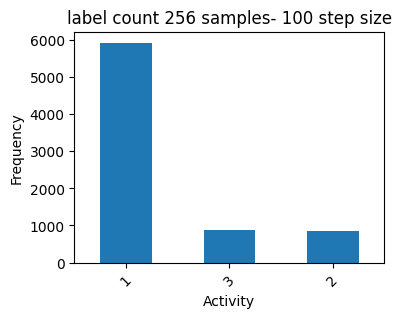

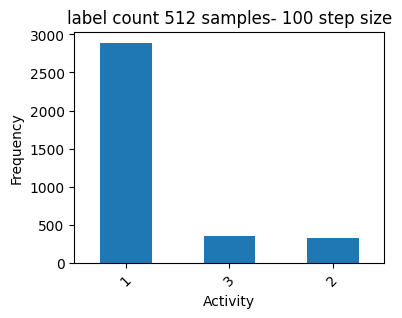

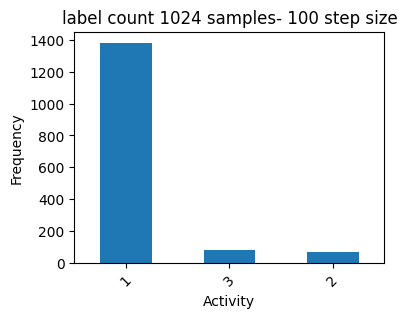

In [10]:
def plot_label_distribution(df, window_size):
    plt.figure(figsize=(4, 3))
    df['activity'].value_counts().plot(kind='bar')
    plt.title(f'label count {window_size} samples- 100 step size')
    plt.xlabel('Activity')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions
plot_label_distribution(norm_256, 256)
plot_label_distribution(norm_512, 512)
plot_label_distribution(norm_1024, 1024)

In [11]:


# Function to prepare data
def prepare_data(df):
    features = [col for col in df.columns if col not in ['activity', 'window_size', 'start_time', 'end_time']]
    X = df[features].values
    y = df['activity'].values

    
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    
    num_samples = len(df)
    num_features = len(features)
    X_reshaped = X.reshape(num_samples, num_features,1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_reshaped, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
    
    return X_train, X_test, y_train, y_test

def build_cnn_model(num_features, num_classes=3):

    input_shape=(num_features, 1)

    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Conv1D(filters=256, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Conv1D(filters=512, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Adjust the number of output neurons based on the number of classes
    ])
    
    return model


def plot_roc_curve(y_test, y_pred_prob, num_classes, title):
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()

def evaluate_model(model, X_test, y_test, title):
    # Predict probabilities and class labels
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f'{title} - Accuracy: {accuracy:.2f}')
    print(f'{title} - Precision: {precision:.2f}')
    print(f'{title} - Recall: {recall:.2f}')
    print(f'{title} - F1 Score: {f1:.2f}')
    
    # Plot ROC curve
    plot_roc_curve(y_test, y_pred_prob,3, title)

# Function to train and evaluate the model
def train_and_evaluate(df,title ='256'):
    X_train, X_test, y_train, y_test = prepare_data(df)
    num_classes = 3
    num_features = X_train.shape[1]
    
    model = build_cnn_model(num_features, num_classes) 
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
    
    evaluate_model(model=model,X_test=X_test,y_test=y_test,title=title)
    
    return model, history



def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{title} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title(f'{title} - Loss')
    
    plt.show()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 90, 64)            256       
                                                                 
 batch_normalization (BatchN  (None, 90, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 45, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 45, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 43, 128)           24704     
                                                                 
 batch_normalization_1 (Batc  (None, 43, 128)          5

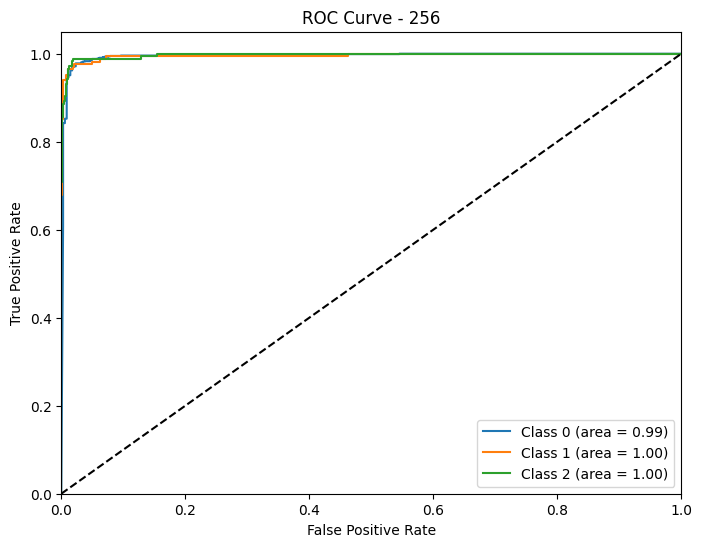

In [12]:
model_256,history_256 =train_and_evaluate(df=norm_256,title='256')


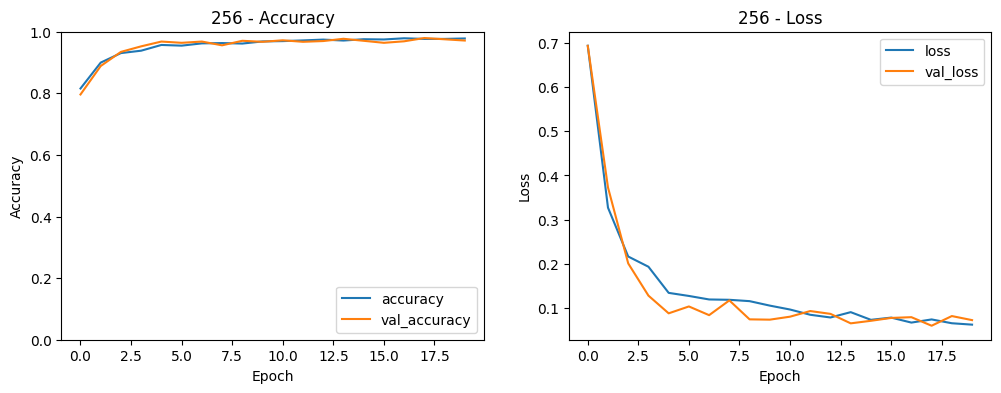

In [14]:
plot_history(history=history_256,title='256')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 90, 64)            256       
                                                                 
 batch_normalization_12 (Bat  (None, 90, 64)           256       
 chNormalization)                                                
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 45, 64)           0         
 g1D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 45, 64)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 43, 128)           24704     
                                                                 
 batch_normalization_13 (Bat  (None, 43, 128)         

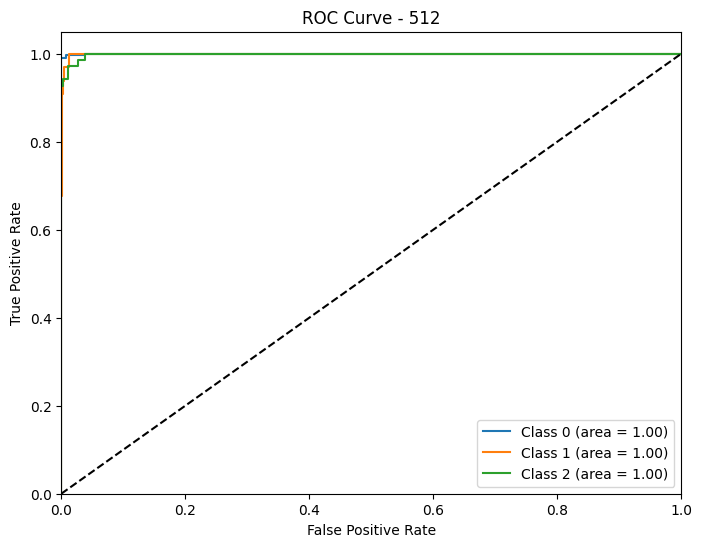

In [19]:
model_512,history_512 =train_and_evaluate(df=norm_512,title='512')


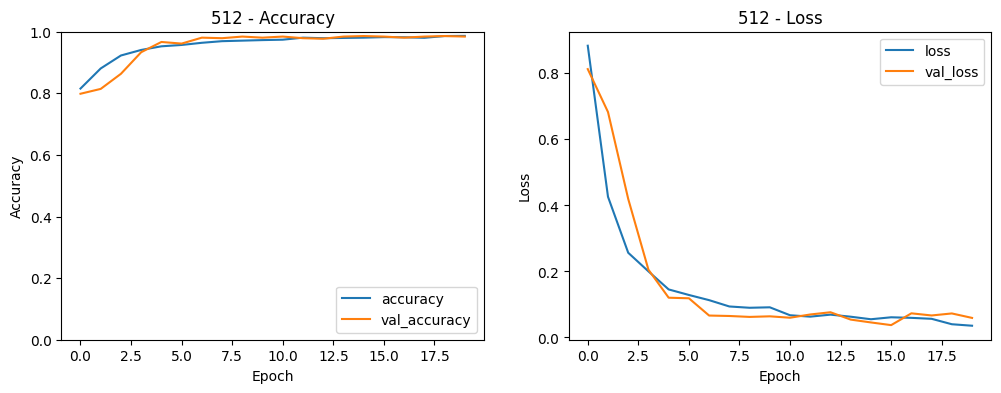

In [16]:
plot_history(history=history_512,title='512')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 90, 64)            256       
                                                                 
 batch_normalization_8 (Batc  (None, 90, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 45, 64)           0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 45, 64)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 43, 128)           24704     
                                                                 
 batch_normalization_9 (Batc  (None, 43, 128)         

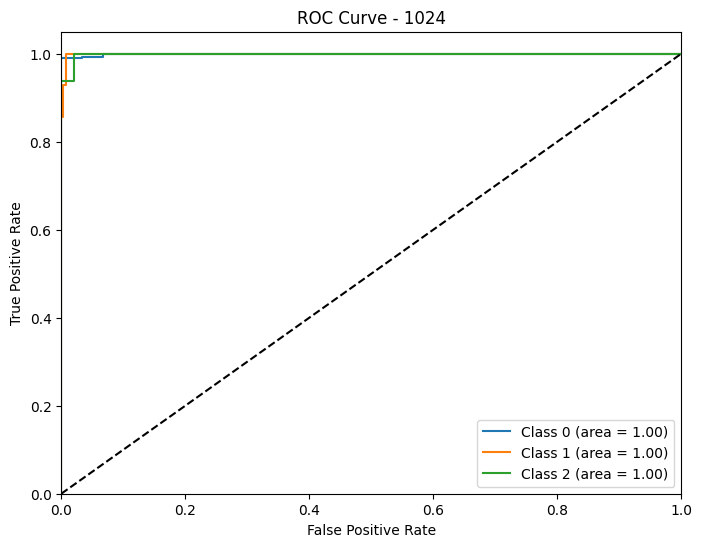

In [17]:
model_1024,history_1024 =train_and_evaluate(df=norm_1024,title='1024')


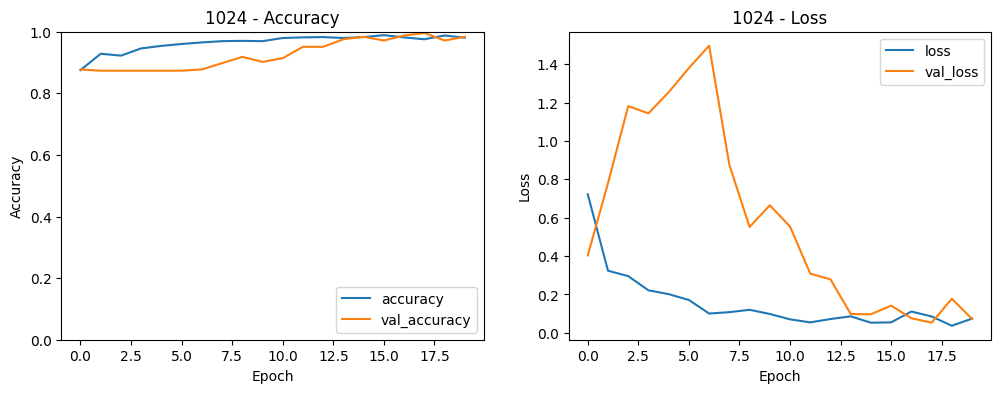

In [18]:
plot_history(history=history_1024,title='1024')